In [13]:
import pandas as pd

In [14]:
# Read the merged dataset
file_path = 'D:/IBM_PROJECT/Climate_Actions_AI/data/processed/merged_climate_dataset.csv'
merged_df = pd.read_csv(file_path)

In [15]:
print("Null Values in Each Column:\n", merged_df.isnull().sum())

Null Values in Each Column:
 Country                             0
Country Code                        0
Year                                0
Annual CO2 Emissions (tonnes)       0
Forest Area (% of land)             0
Urban_Growth                        0
AverageTemperature               4543
dtype: int64


In [16]:
missing_before = merged_df['AverageTemperature'].isna().sum()
print(f"Missing values before dropping: {missing_before}")

Missing values before dropping: 4543


In [17]:
df_cleaned = merged_df.dropna(subset=['AverageTemperature'])

In [18]:
missing_after = df_cleaned['AverageTemperature'].isna().sum()
print(f"Missing values after dropping: {missing_after}")

Missing values after dropping: 0


In [19]:
rows_dropped = df_cleaned.shape[0] - df_cleaned.shape[0]
print(f"Total rows dropped: {rows_dropped}")

Total rows dropped: 0


In [20]:
df_cleaned.to_csv('D:/IBM_PROJECT/Climate_Actions_AI/data/processed/merged_climate_dataset_cleaned.csv', index=False)

In [21]:
duplicate_count = df_cleaned.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 310


In [22]:
if duplicate_count > 0:
    duplicates = df_cleaned[df_cleaned.duplicated()]
    print(duplicates)

             Country Country Code  Year  Annual CO2 Emissions (tonnes)  \
690        Australia          AUS  1994                   2.940146e+08   
982        Australia          AUS  1997                   3.207947e+08   
1471       Australia          AUS  2002                   3.622091e+08   
2435       Australia          AUS  2012                   4.071461e+08   
2931          Brazil          BRA  1990                   2.069211e+08   
...              ...          ...   ...                            ...   
47168  United States          USA  2012                   5.366730e+09   
47322  United States          USA  2013                   5.519613e+09   
47419  United States          USA  2013                   5.519613e+09   
47546  United States          USA  2013                   5.519613e+09   
47624  United States          USA  2013                   5.519613e+09   

       Forest Area (% of land)  Urban_Growth  AverageTemperature  
690                  17.319678      0.811494

In [23]:
df_cleaned.drop_duplicates()

,Country,Country Code,Year,Annual CO2 Emissions (tonnes),Forest Area (% of land),Urban_Growth,AverageTemperature
250,Australia,AUS,1990,2.784244e+08,17.427359,1.444942,18.549
251,Australia,AUS,1990,2.784244e+08,17.427359,1.444942,17.791
252,Australia,AUS,1990,2.784244e+08,17.427359,1.444942,16.636
253,Australia,AUS,1990,2.784244e+08,17.427359,1.444942,13.734
254,Australia,AUS,1990,2.784244e+08,17.427359,1.444942,9.308
...,...,...,...,...,...,...,...
47623,United States,USA,2013,5.519613e+09,33.839596,0.978210,1.673
47625,United States,USA,2013,5.519613e+09,33.839596,0.978210,16.267
47626,United States,USA,2013,5.519613e+09,33.839596,0.978210,20.222
47627,United States,USA,2013,5.519613e+09,33.839596,0.978210,19.621


EDA

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
df = pd.read_csv("merged_climate_dataset_cleaned.csv")  
print(df.head())

     Country Country Code  Year  Annual CO2 Emissions (tonnes)  \
0  Australia          AUS  1990                    278424375.7   
1  Australia          AUS  1990                    278424375.7   
2  Australia          AUS  1990                    278424375.7   
3  Australia          AUS  1990                    278424375.7   
4  Australia          AUS  1990                    278424375.7   

   Forest Area (% of land)  Urban_Growth  AverageTemperature  
0                17.427359      1.444942              18.549  
1                17.427359      1.444942              17.791  
2                17.427359      1.444942              16.636  
3                17.427359      1.444942              13.734  
4                17.427359      1.444942               9.308  


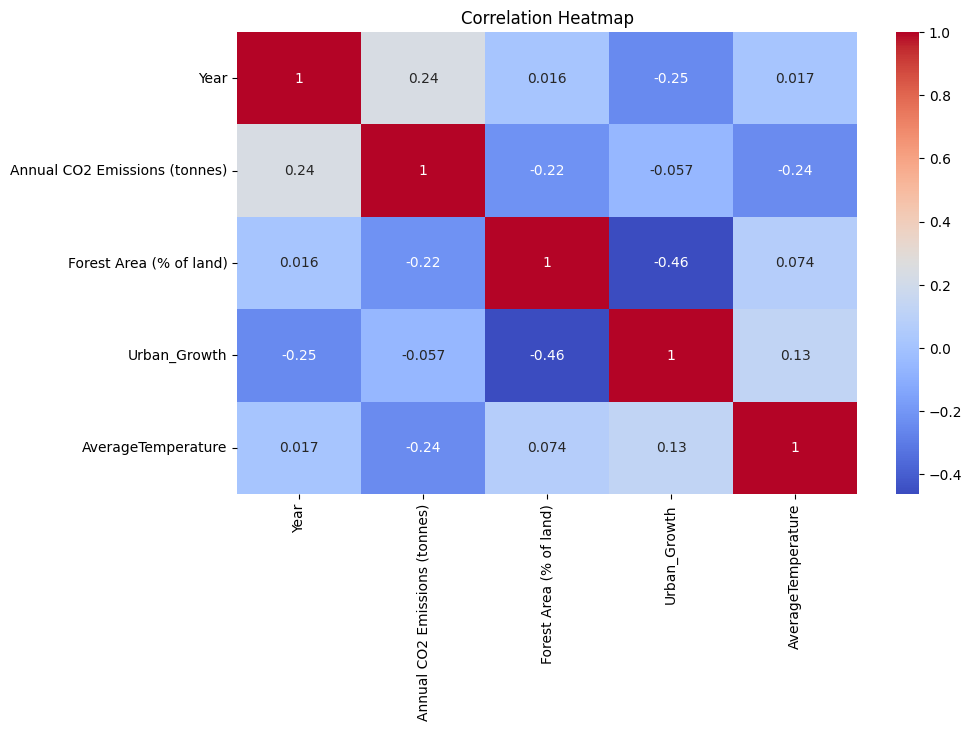

In [27]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

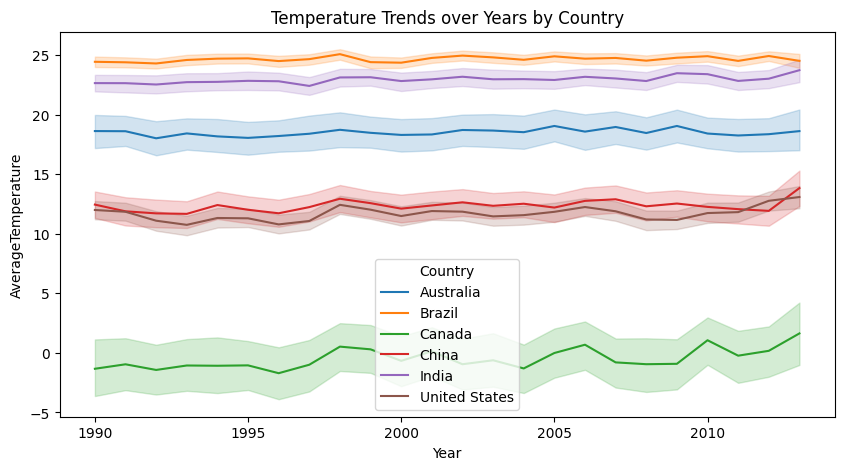

In [28]:
# Trend of AverageTemperature over years 
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='AverageTemperature', hue='Country')
plt.title('Temperature Trends over Years by Country')
plt.show()

In [29]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [30]:
X = df[['Country', 'Year', 'Annual CO2 Emissions (tonnes)', 'Forest Area (% of land)', 'Urban_Growth']]
y = df['AverageTemperature']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) 

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = model.predict(X_test_scaled)

In [35]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [36]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 8.48
RMSE: 10.08
R2 Score: -0.00


In [37]:
# Filter dataset for a single country (e.g., India)
df = df[df['Country'] == 'India'].sort_values('Year')

# Reset index
country_df = df.reset_index(drop=True)


In [38]:
# Choose features and target
features = ['Year', 'Annual CO2 Emissions (tonnes)', 'Forest Area (% of land)', 'Urban_Growth']
target = 'AverageTemperature'

X = country_df[features]
y = country_df[target]

# Split: 80% train, 20% test
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [39]:
import pandas as pd
import numpy as np

# Make sure to import or reuse your label encoder, scaler, and trained model from previous steps

# Country name to label mapping (based on your LabelEncoder)
# You must have this from when you encoded the 'Country' column
country_encoder = le  # Assuming 'le' is your LabelEncoder
scaler_used = scaler  # Your StandardScaler
trained_model = model  # Your trained RandomForestRegressor

# 1. Get user input
user_country = input("Enter country name (as in dataset, e.g., 'India'): ")
user_year = int(input("Enter year (e.g., 2030): "))
user_co2 = float(input("Enter annual CO2 emissions (tonnes): "))
user_forest_area = float(input("Enter forest area (% of land): "))
user_urban_growth = float(input("Enter urban growth rate (%): "))

# 2. Encode the country using the same LabelEncoder
try:
    country_encoded = country_encoder.transform([user_country])[0]
except ValueError:
    print(f"Country '{user_country}' not found in training data.")
    exit()

# 3. Create input array
user_features = np.array([[country_encoded, user_year, user_co2, user_forest_area, user_urban_growth]])

# 4. Scale the input features using same scaler
user_features_scaled = scaler_used.transform(user_features)

# 5. Predict using the trained model
predicted_temp = trained_model.predict(user_features_scaled)[0]

# 6. Output
print(f"\nPredicted Average Temperature for {user_country} in {user_year}: {predicted_temp:.2f}°C")



Predicted Average Temperature for India in 2025: 19.85°C


c:\Users\Prerana V\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
